13


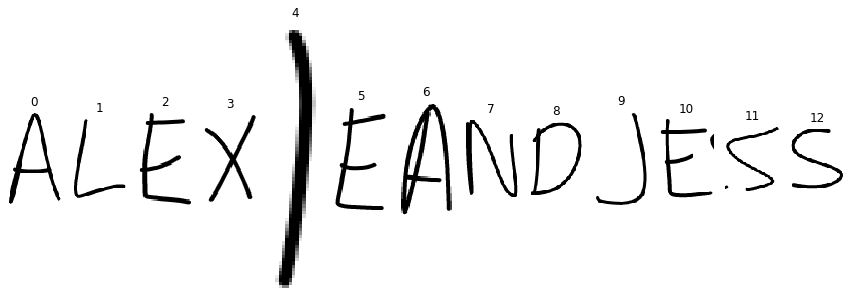

In [54]:
import cv2
import glob
import imutils
import matplotlib.pyplot as plt

image = cv2.imread("image2.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

letter_image_regions = []

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        letter_image_regions.append((x, y, w, h))
    
            
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

letters = []

for letter_bounding_box in letter_image_regions:
    x, y, w, h = letter_bounding_box
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]
    letters.append(letter_image)



indicies = [14,32,44,54,55,56,57,58,59,60]

fig, axs = plt.subplots(1,len(letters), figsize=(15,5))


for idx, ax in enumerate(axs):
    ax.set_title(idx)
    ax.axis('off')
    ax.imshow(letters[idx], cmap='gray')    
    #ax.imshow(letters[indicies[idx]], cmap='gray')    
    
print(len(letters))


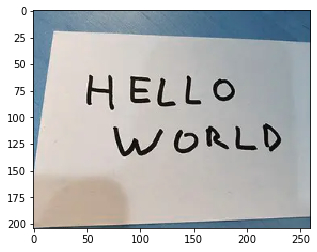

In [9]:
plt.imshow(image)